In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from collections import Counter
from sklearn.feature_selection import mutual_info_classif
warnings.filterwarnings("ignore")

In [230]:
df = pd.read_csv("./Hotel Reservations.csv")
print("shape of dataset :",df.shape)
df.head()

shape of dataset : (36275, 19)


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [232]:
df.duplicated().sum()

0

In [233]:
df = df.drop(labels=['Booking_ID', 'arrival_year', 'arrival_month', 'arrival_date', 'type_of_meal_plan', 
                                'room_type_reserved', 'market_segment_type'], axis=1)

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   required_car_parking_space            36275 non-null  int64  
 5   lead_time                             36275 non-null  int64  
 6   repeated_guest                        36275 non-null  int64  
 7   no_of_previous_cancellations          36275 non-null  int64  
 8   no_of_previous_bookings_not_canceled  36275 non-null  int64  
 9   avg_price_per_room                    36275 non-null  float64
 10  no_of_special_requests                36275 non-null  int64  
 11  booking_status 

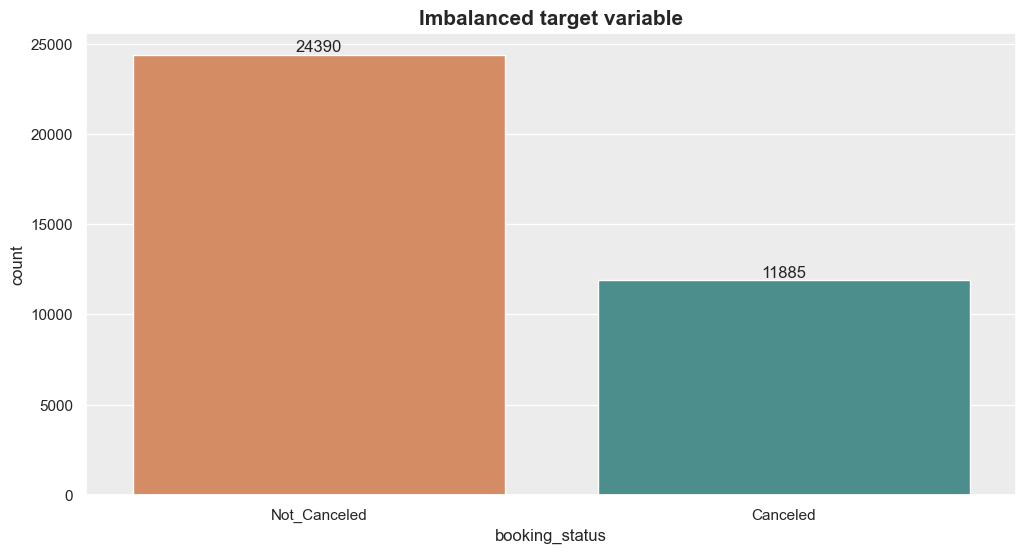

In [235]:
palette_features = ['#E68753', '#409996']
#plotting 'Exited' = target variable
sns.set(rc={'axes.facecolor':'#ECECEC'}) #background color of plot
plt.figure(figsize=(12,6))
plt.title("Imbalanced target variable", fontsize=15, fontweight='bold', ha='center')
ax = sns.countplot(x=df['booking_status'], data=df, palette=palette_features)

#add labels to each bar
abs_values = df['booking_status'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values) 

#show the plot
plt.show()


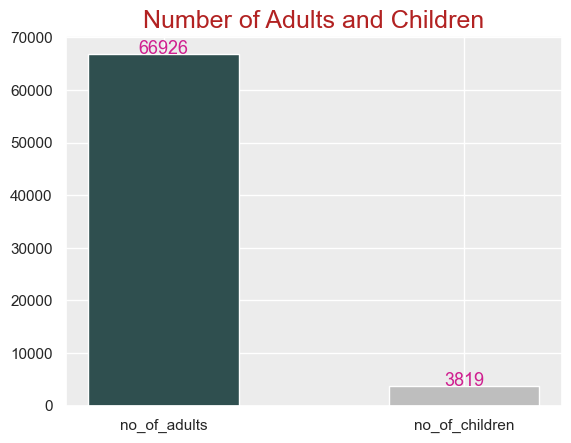

In [236]:
fig, ax = plt.subplots()
ax.bar(np.arange(2),[df.no_of_adults.sum(),df.no_of_children.sum()],width=0.5,color = ["#2f4f4f","#bebebe"])
plt.xticks(np.arange(2),("no_of_adults","no_of_children"))
plt.title("Number of Adults and Children",color="#b22222",fontsize=18)
for i, v in enumerate([df.no_of_adults.sum(),df.no_of_children.sum()]):
    ax.text(i, v + 0.5, str(v), ha='center',color="#d02090",fontsize=13)

In [237]:
df.booking_status = df.booking_status.replace({"Not_Canceled":0, "Canceled":1})

<Axes: >

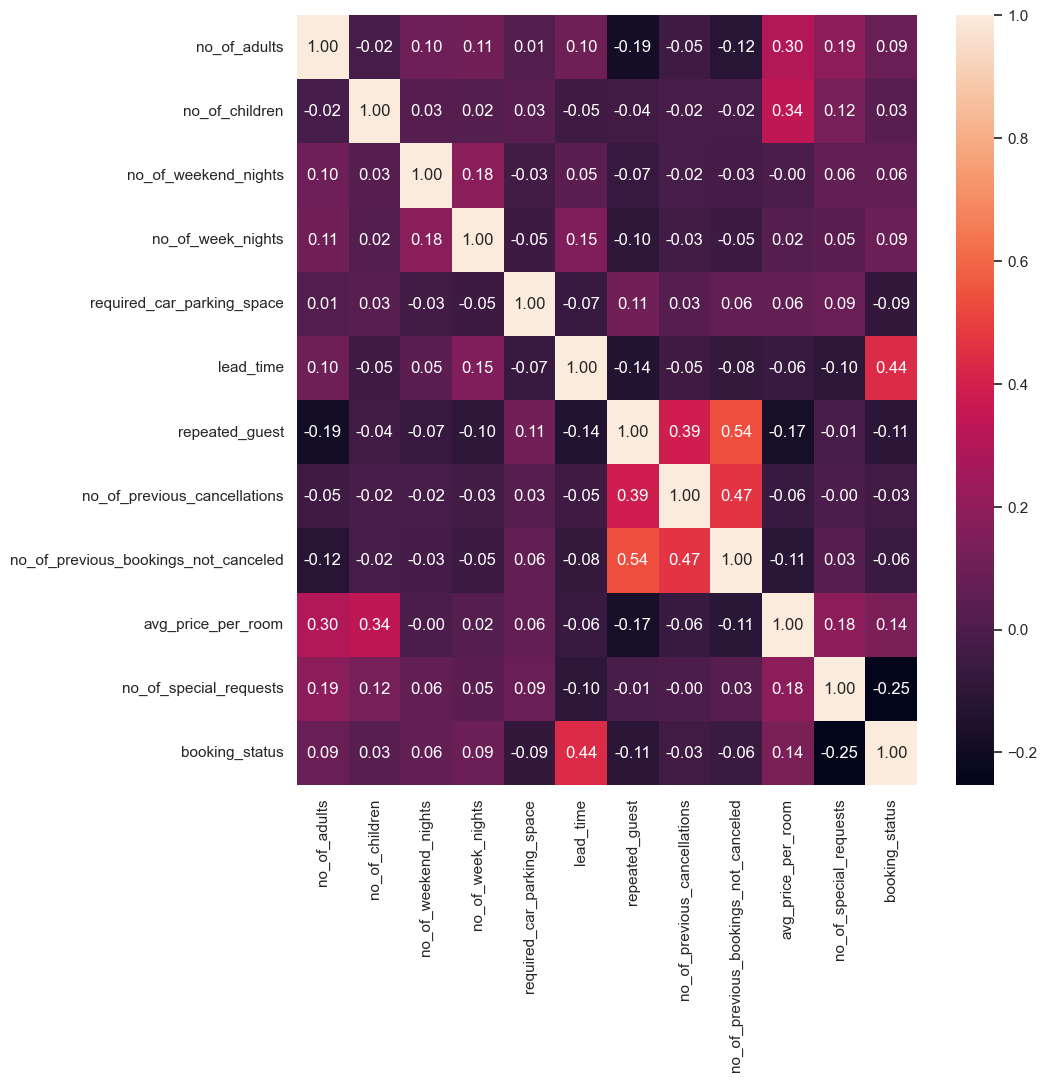

In [238]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True, fmt=".2f")

In [239]:
df[["no_of_weekend_nights","no_of_week_nights"]]

,no_of_weekend_nights,no_of_week_nights
0,1,2
1,2,3
2,2,1
3,0,2
4,1,1
...,...,...
36270,2,6
36271,1,3
36272,2,6
36273,0,3


In [240]:
df["cancellations_rate"] = df["no_of_previous_cancellations"] / (df["no_of_previous_cancellations"] + df["no_of_previous_bookings_not_canceled"]) *100
df.cancellations_rate.fillna(0,inplace=True)

In [241]:
df.drop(columns=["no_of_previous_cancellations","no_of_previous_bookings_not_canceled"],inplace=True)

In [242]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,repeated_guest,avg_price_per_room,no_of_special_requests,booking_status,cancellations_rate
0,2,0,1,2,0,224,0,65.00,0,0,0.0
1,2,0,2,3,0,5,0,106.68,1,0,0.0
2,1,0,2,1,0,1,0,60.00,0,1,0.0
3,2,0,0,2,0,211,0,100.00,0,1,0.0
4,2,0,1,1,0,48,0,94.50,0,1,0.0


In [243]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,repeated_guest,avg_price_per_room,no_of_special_requests,booking_status,cancellations_rate
0,2,0,1,2,0,224,0,65.00,0,0,0.0
1,2,0,2,3,0,5,0,106.68,1,0,0.0
2,1,0,2,1,0,1,0,60.00,0,1,0.0
3,2,0,0,2,0,211,0,100.00,0,1,0.0
4,2,0,1,1,0,48,0,94.50,0,1,0.0


<Axes: >

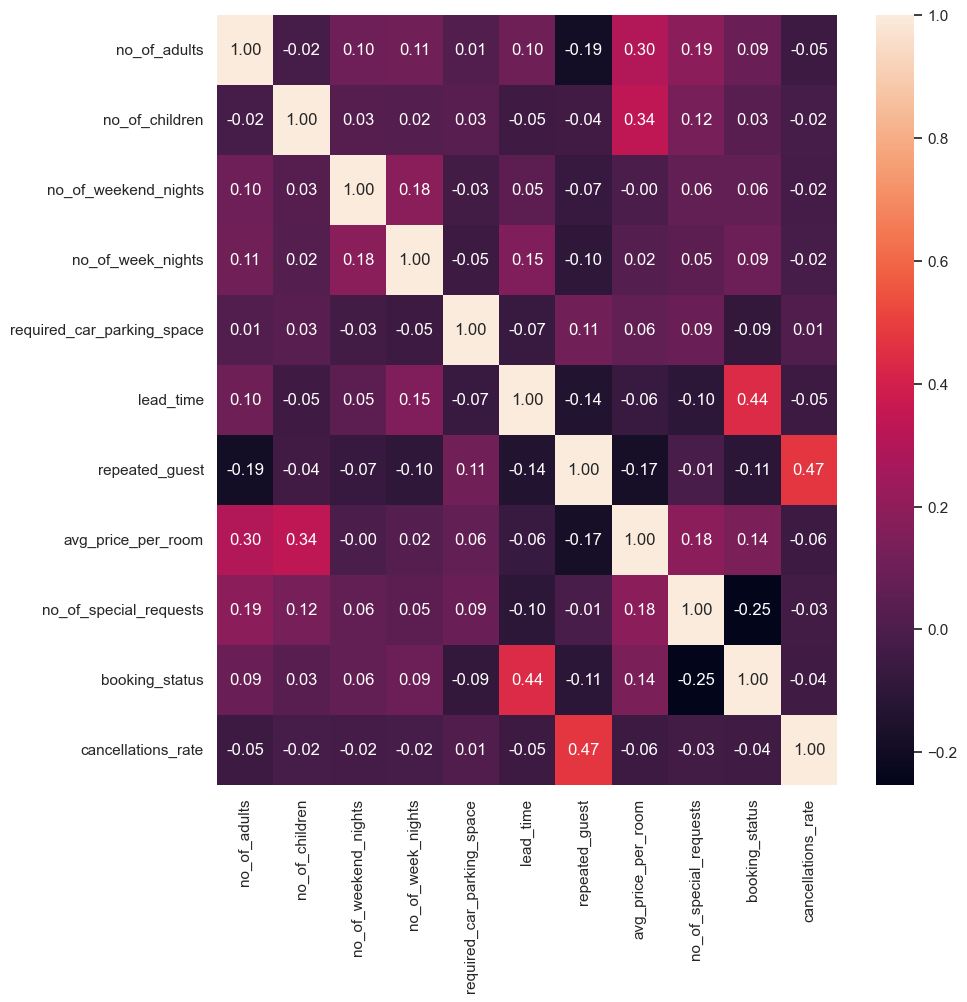

In [244]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True, fmt=".2f")

<Axes: >

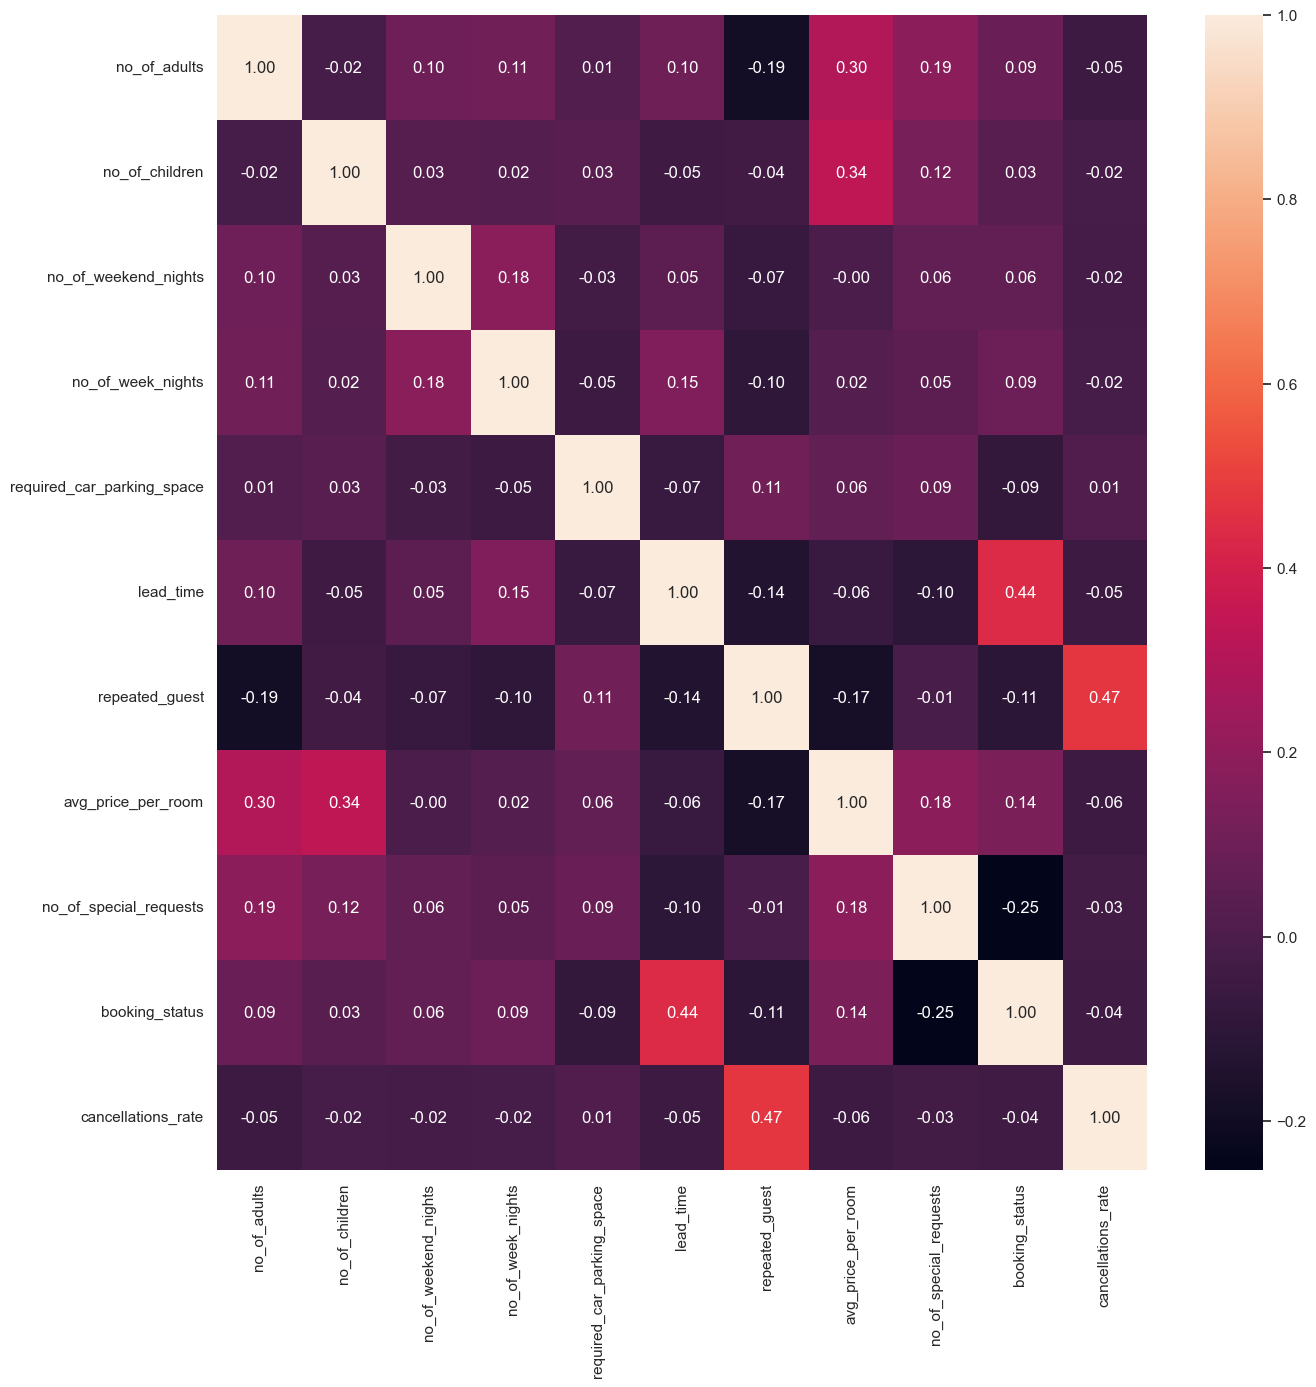

In [245]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True, fmt=".2f")

In [246]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,repeated_guest,avg_price_per_room,no_of_special_requests,booking_status,cancellations_rate
0,2,0,1,2,0,224,0,65.00,0,0,0.0
1,2,0,2,3,0,5,0,106.68,1,0,0.0
2,1,0,2,1,0,1,0,60.00,0,1,0.0
3,2,0,0,2,0,211,0,100.00,0,1,0.0
4,2,0,1,1,0,48,0,94.50,0,1,0.0


In [247]:
X = df.drop(columns="booking_status")
y = df.booking_status

In [248]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
print("Train_x :",X_train.shape)
print("Test_x :",X_test.shape)
print("Train_y :",y_train.shape)
print("Test_y :",y_test.shape)

Train_x : (29020, 10)
Test_x : (7255, 10)
Train_y : (29020,)
Test_y : (7255,)


In [249]:
X_train.head(10)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,repeated_guest,avg_price_per_room,no_of_special_requests,cancellations_rate
25629,2,1,2,1,0,26,0,161.00,0,0.0
14473,2,1,1,1,0,98,0,121.50,2,0.0
23720,2,0,0,3,0,433,0,70.00,0,0.0
5843,2,0,2,5,0,195,0,72.25,0,0.0
18709,1,0,0,2,0,188,0,130.00,0,0.0
7411,2,1,0,3,0,74,0,112.50,1,0.0
22965,2,0,1,2,0,273,0,95.00,0,0.0
25677,2,0,1,3,0,6,0,66.30,0,0.0
33711,2,0,2,5,0,89,0,83.66,1,0.0
20727,2,2,2,0,0,56,0,180.00,1,0.0


In [250]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
print("Accuracy of Random Forest : {}%".format(rf.score(X_test,y_test)*100))

Accuracy of Random Forest : 87.11233631977946%


Text(47.25, 0.5, 'True Label')

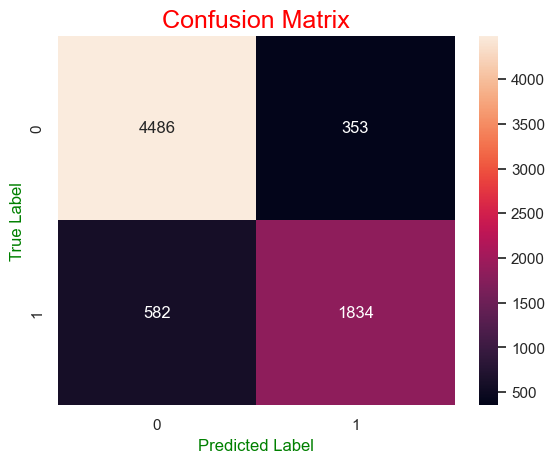

In [251]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, rf.predict(X_test)), annot=True, fmt=".0f")
plt.title("Confusion Matrix", color = "red", fontsize=18)
plt.xlabel("Predicted Label", color = "green", fontsize = 12)
plt.ylabel("True Label", color = "green", fontsize = 12)

In [252]:
from imblearn.over_sampling import RandomOverSampler
#balancing the target variable
columns = df.columns[:-1]

ros = RandomOverSampler(sampling_strategy='minority')
X_train_balanced, y_train_balanced = ros.fit_resample(X_train, y_train) #y_train as balanced target variable
print(f"Imbalanced target class: {(y)}\n\nBalanced target class: {Counter(y_train_balanced)}\n")
print(X_train_balanced.shape[0] - df.shape[0], 'new random picked points')

Imbalanced target class: 0        0
1        0
2        1
3        1
4        1
        ..
36270    0
36271    1
36272    0
36273    1
36274    0
Name: booking_status, Length: 36275, dtype: int64

Balanced target class: Counter({0: 19551, 1: 19551})

2827 new random picked points


In [253]:
rf_sampled = RandomForestClassifier(n_estimators=110,random_state=42)
rf_sampled.fit(X_train_balanced, y_train_balanced)
print("Accuracy of Random Forest : % {}".format(rf_sampled.score(X_test, y_test)*100))

Accuracy of Random Forest : % 86.14748449345278


In [254]:
X_train_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39102 entries, 0 to 39101
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   no_of_adults                39102 non-null  int64  
 1   no_of_children              39102 non-null  int64  
 2   no_of_weekend_nights        39102 non-null  int64  
 3   no_of_week_nights           39102 non-null  int64  
 4   required_car_parking_space  39102 non-null  int64  
 5   lead_time                   39102 non-null  int64  
 6   repeated_guest              39102 non-null  int64  
 7   avg_price_per_room          39102 non-null  float64
 8   no_of_special_requests      39102 non-null  int64  
 9   cancellations_rate          39102 non-null  float64
dtypes: float64(2), int64(8)
memory usage: 3.0 MB


In [255]:
import pickle
with open("model.pkl", "wb") as f:
    pickle.dump(rf_sampled, f)

In [256]:
X_test.head(10)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,repeated_guest,avg_price_per_room,no_of_special_requests,cancellations_rate
4968,2,1,1,0,0,3,0,90.00,3,0.0
34540,2,0,1,2,0,9,0,48.67,0,0.0
36108,2,0,2,2,0,24,0,95.20,1,0.0
1553,2,0,0,3,0,23,0,127.67,0,0.0
24974,2,1,0,2,0,9,0,201.50,2,0.0
27079,2,0,0,2,0,102,0,109.00,0,0.0
29145,2,0,1,1,0,99,0,107.10,0,0.0
5925,1,0,0,1,0,0,0,85.00,0,0.0
17355,2,1,2,4,0,47,0,129.99,1,0.0
25283,2,0,2,3,0,131,0,82.79,2,0.0


In [257]:
y_test.head(10)

4968     0
34540    0
36108    0
1553     1
24974    0
27079    0
29145    1
5925     0
17355    0
25283    0
Name: booking_status, dtype: int64